In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#data statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
#check missing data
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

No missing data. We can visualize it

#### Data Visualization

<Axes: xlabel='Churn', ylabel='count'>

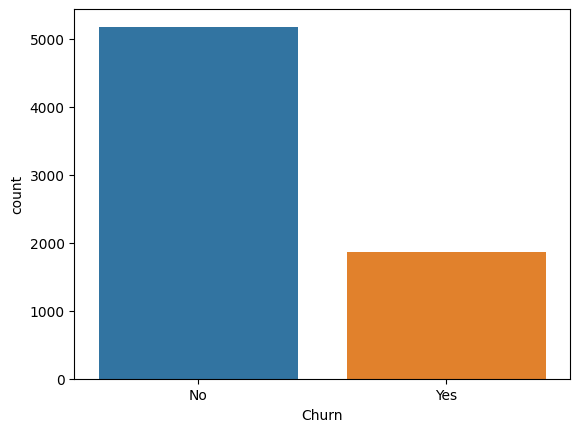

In [12]:
#Churn Distribution
sns.countplot(df, x="Churn")

Ada lebih banyak customer yang memilih untuk tidak churn dibandingkan yang churn

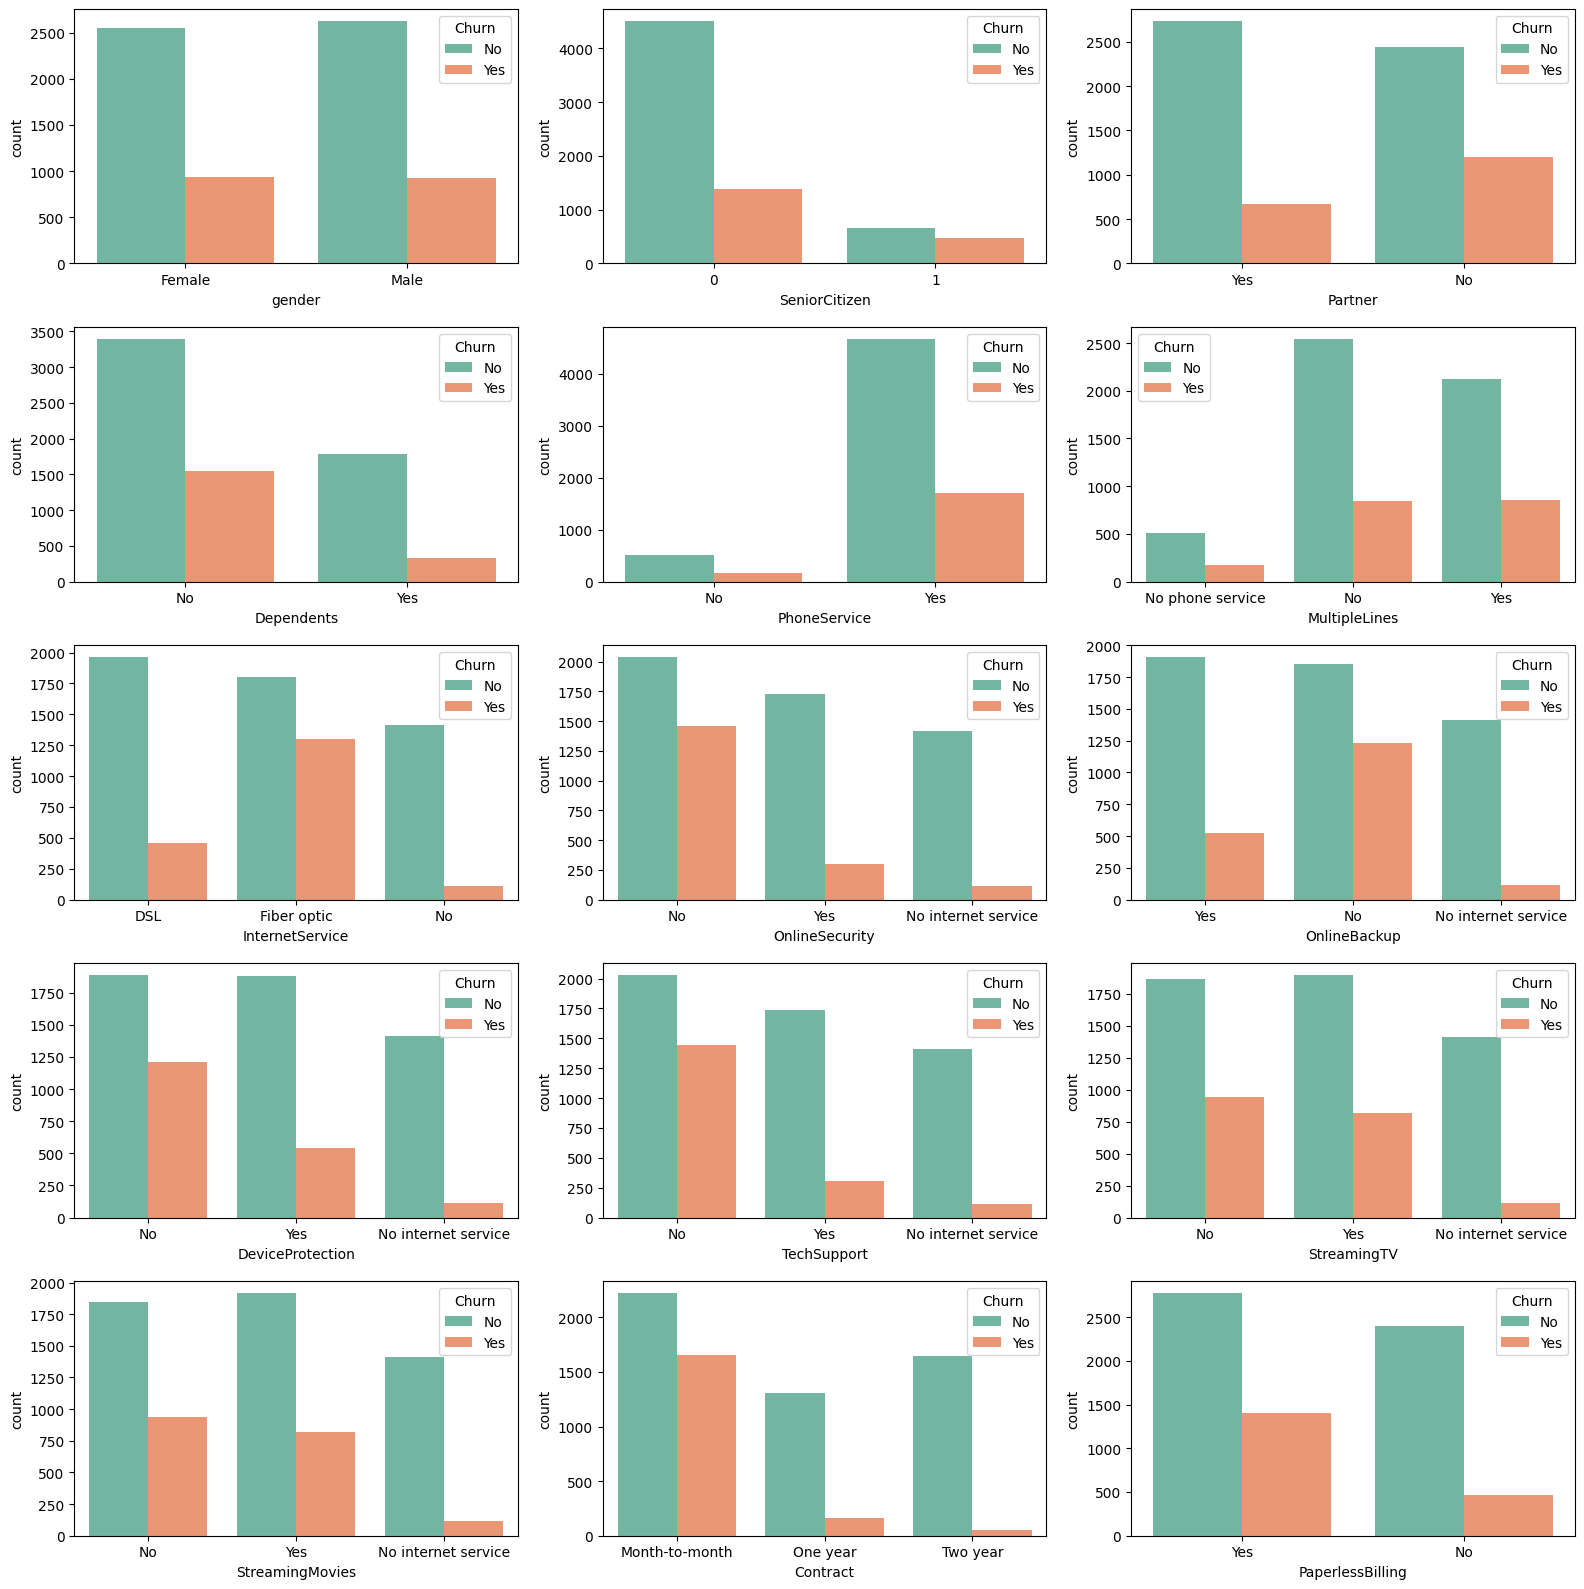

In [31]:
cols = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']]

#parameter distribution vis
plt.figure(figsize=(16,16))
i=1
for col in cols:
    plt.subplot(5,3,i)
    sns.countplot(df, x=col, hue="Churn", palette='Set2')
    i+=1
plt.tight_layout()
plt.show()

##### Insight:
- Tidak ada perbedaan yang signifikan terhadap customer yang memilih churn dan tidak memilih churn berdasarkan 2 jenis kelamin.
- Ada lebih banyak customer berusia muda dibandingkan customer berusia lanjut. Customer yang memilih untuk churn kebanyakan berusia muda, tetapi perbandingan yang memilih churn dan tidak memilih churn pada customer berusia lanjut hampir sama.
- Customer yang tidak memiliki partner dan hidupnya bergantung terhadap orang lain lebih banyak memilih churn.
- Customer yang internet service-nya berupa Fiber Optic lebih banyak memilih churn.
- Customer yang memiliki layanan Phone Services dan Multiple Lines lebih banyak memilih churn, namun hampir tidak ada perbedaan yang signifikan terhadap customer dengan layanan Multiple Lines dan yang tidak memiliki layanan MultipleLines untuk churn.
- Kebalikannya, customer yang tidak memiliki layanan Online Backup, Device Protection, Tech Support, Streaming TV, dan Streaming Movies lebih banyak memiih churn.
- Kebanyakan customer melakukan kontrak secara month-to-month, dan yang banyak memilih untuk churn juga customer yang melakukan kontrak secara month-to-month
- Customer yang memiliki paperless billing banyak yang memilih untuk churn

<Axes: xlabel='PaymentMethod', ylabel='count'>

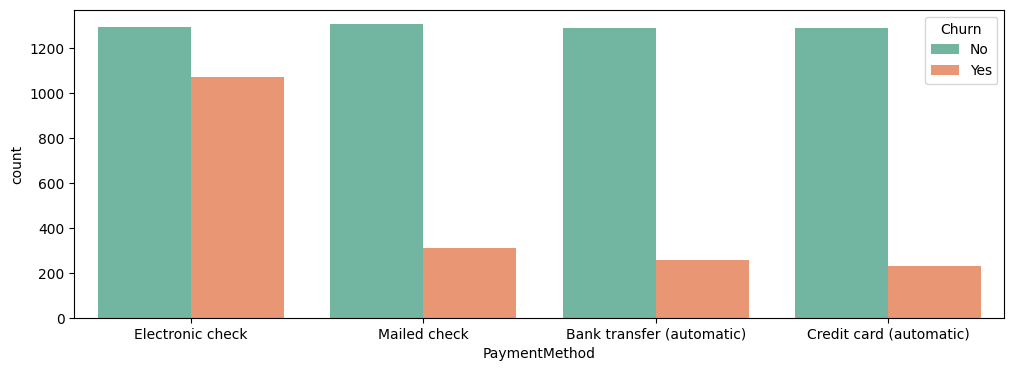

In [37]:
#churn distribution of payment method
plt.figure(figsize=(12,4))
sns.countplot(df, x='PaymentMethod', hue="Churn", palette='Set2')

Pada grafik diatas terlihat, setiap metode pembayaran memiliki perbandingan yang sama terhadap customer yang tidak memilih churn. Namun, customer dengan metode pembayaran Electronic check lebih banyak yang memilih untuk churn.

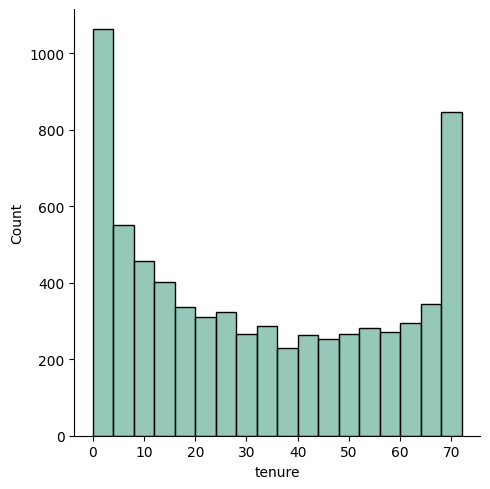

In [42]:
#tenure distribution
sns.displot(df, x="tenure", binwidth=4, color='#72B6A1');

Kebanyakan pelanggan kemungkinan adalah pelanggan baru karena memiliki periode tenure yang rendah pada awalnya. Kelompok customer dengan periode tenure yang paling tinggi juga terhitung banyak yang berarti kemungkinan besar sangat puas dengan layanan atau produk yang mereka terima.

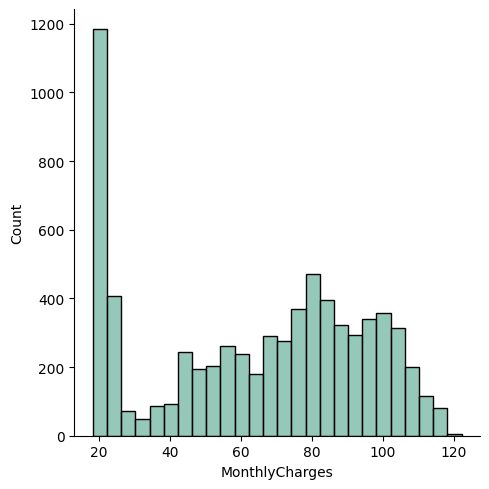

In [43]:
#distribution of month charge
sns.displot(df, x="MonthlyCharges", binwidth=4, color='#72B6A1');

Kebanyakan customer membayar biaya bulanan yang rendah untuk sebuah layanan